In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

2023-11-06 10:54:04.145078: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os
filename="/Users/oliviashuter/LIP CODE/combined.csv"

# Loading dataset
dfall = pd.read_csv(filename) 
print ("\nFile loaded with ",dfall.shape[0], " events ")


File loaded with  10389179  events 


In [3]:
label_nevents = (dfall[dfall.label==0].shape[0], dfall[dfall.label==1].shape[0] )
print("Number of events per class (B, S):",label_nevents)

Number of events per class (B, S): (10316120, 73059)


In [4]:
bkgdata = dfall.drop(dfall[dfall['label'] == 1].index)

In [5]:
sigData = dfall.drop(dfall[dfall['label'] == 0].index)

In [6]:
filename="/Users/oliviashuter/Downloads/bbA2000_yb2_Zhvvbb.csv"
bbasig = pd.read_csv(filename) 

filename="/Users/oliviashuter/Downloads/GG_direct_2000_0.csv"
ggsig = pd.read_csv(filename) 


In [7]:
ref_background = pd.DataFrame(bkgdata, columns =['jet_DL1r_max', 'normalisedCombinedWeight', 'jet_e',
       'mcChannelNumber', 'topjet_pt', 'MET_eta', 'topjet_e', 'ljet_m',
       'nLumi', 'MET', 'topjet_phi', 'jet_eta', 'ljet_py', 'ljet_phi',
       'ljet_pz', 'DeltaR_max', 'combinedWeight', 'squaredCombinedWeight',
       'ljet_eta', 'ljet_pt', 'jet_pt', 'MET_px', 'MET_m', 'MET_Phi',
       'mc_channel', 'jet_pz', 'MET_py', 'jet_py', 'mtop', 'Centrality',
       'jet_px', 'merge_sample', 'train_weight', 'ljet_e', 'topjet_eta',
       'gen_sample', 'category', 'jet_phi', 'ljet_px', 'gen_split', 'topjet_m',
       'HT', 'Omega', 'positiveCombinedWeight'])

print ("Dataframe shape, refined background ",ref_background.shape)

ref_signal = pd.DataFrame(sigData, columns =['jet_DL1r_max', 'normalisedCombinedWeight', 'jet_e',
       'mcChannelNumber', 'topjet_pt', 'MET_eta', 'topjet_e', 'ljet_m',
       'nLumi', 'MET', 'topjet_phi', 'jet_eta', 'ljet_py', 'ljet_phi',
       'ljet_pz', 'DeltaR_max', 'combinedWeight', 'squaredCombinedWeight',
       'ljet_eta', 'ljet_pt', 'jet_pt', 'MET_px', 'MET_m', 'MET_Phi',
       'mc_channel', 'jet_pz', 'MET_py', 'jet_py', 'mtop', 'Centrality',
       'jet_px', 'merge_sample', 'train_weight', 'ljet_e', 'topjet_eta',
       'gen_sample', 'category', 'jet_phi', 'ljet_px', 'gen_split', 'topjet_m',
       'HT', 'Omega', 'positiveCombinedWeight'])

print ("Dataframe shape, refined sig ",ref_signal.shape)

ref_bbasignal = pd.DataFrame(bbasig, columns =['jet_DL1r_max', 'normalisedCombinedWeight', 'jet_e',
       'mcChannelNumber', 'topjet_pt', 'MET_eta', 'topjet_e', 'ljet_m',
       'nLumi', 'MET', 'topjet_phi', 'jet_eta', 'ljet_py', 'ljet_phi',
       'ljet_pz', 'DeltaR_max', 'combinedWeight', 'squaredCombinedWeight',
       'ljet_eta', 'ljet_pt', 'jet_pt', 'MET_px', 'MET_m', 'MET_Phi',
       'mc_channel', 'jet_pz', 'MET_py', 'jet_py', 'mtop', 'Centrality',
       'jet_px', 'merge_sample', 'train_weight', 'ljet_e', 'topjet_eta',
       'gen_sample', 'category', 'jet_phi', 'ljet_px', 'gen_split', 'topjet_m',
       'HT', 'Omega', 'positiveCombinedWeight'])

print ("Dataframe shape, refined sig ",ref_bbasignal.shape)

ref_ggsignal = pd.DataFrame(ggsig, columns =['jet_DL1r_max', 'normalisedCombinedWeight', 'jet_e',
       'mcChannelNumber', 'topjet_pt', 'MET_eta', 'topjet_e', 'ljet_m',
       'nLumi', 'MET', 'topjet_phi', 'jet_eta', 'ljet_py', 'ljet_phi',
       'ljet_pz', 'DeltaR_max', 'combinedWeight', 'squaredCombinedWeight',
       'ljet_eta', 'ljet_pt', 'jet_pt', 'MET_px', 'MET_m', 'MET_Phi',
       'mc_channel', 'jet_pz', 'MET_py', 'jet_py', 'mtop', 'Centrality',
       'jet_px', 'merge_sample', 'train_weight', 'ljet_e', 'topjet_eta',
       'gen_sample', 'category', 'jet_phi', 'ljet_px', 'gen_split', 'topjet_m',
       'HT', 'Omega', 'positiveCombinedWeight'])

print ("Dataframe shape, refined sig ",ref_ggsignal.shape)

Dataframe shape, refined background  (10316120, 44)
Dataframe shape, refined sig  (73059, 44)
Dataframe shape, refined sig  (8026, 44)
Dataframe shape, refined sig  (3490, 44)


In [9]:
bkg_train = ref_background.loc[ref_background['gen_split']== 'train'].drop([ 'normalisedCombinedWeight',
       'mcChannelNumber', 
       'nLumi', 
        'combinedWeight', 'squaredCombinedWeight',
       'mc_channel', 'merge_sample', 
       'gen_sample', 'category', 'gen_split', 
       'positiveCombinedWeight'], axis=1)


bkg_test = ref_background.loc[ref_background['gen_split']== 'test'].drop([ 'normalisedCombinedWeight',
       'mcChannelNumber', 
       'nLumi', 
        'combinedWeight', 'squaredCombinedWeight',
       'mc_channel', 'merge_sample', 
       'gen_sample', 'category', 'gen_split', 
       'positiveCombinedWeight'], axis=1)
bkg_val = ref_background.loc[ref_background['gen_split']== 'val'].drop([ 'normalisedCombinedWeight',
       'mcChannelNumber', 
       'nLumi', 
        'combinedWeight', 'squaredCombinedWeight',
       'mc_channel', 'merge_sample', 
       'gen_sample', 'category', 'gen_split', 
       'positiveCombinedWeight'], axis=1)

bkg_train_weights = bkg_train['train_weight']

bkg_test_weights = bkg_test['train_weight']

bkg_val_weights = bkg_val['train_weight']

bkg_train = bkg_train.drop(['train_weight'], axis=1)
bkg_test = bkg_test.drop(['train_weight'], axis=1)
bkg_val = bkg_val.drop(['train_weight'], axis=1)

In [10]:
sig_data = ref_signal.drop([ 'normalisedCombinedWeight',
       'mcChannelNumber', 
       'nLumi', 'combinedWeight', 'squaredCombinedWeight',
       'mc_channel', 'merge_sample', 
       'gen_sample', 'category', 'gen_split', 
       'positiveCombinedWeight'], axis=1)

sigData_weights = sig_data['train_weight']

bbasignal = ref_bbasignal.drop([ 'normalisedCombinedWeight',
       'mcChannelNumber', 
       'nLumi', 
        'combinedWeight', 'squaredCombinedWeight',
       'mc_channel', 'merge_sample', 
       'gen_sample', 'category', 'gen_split', 
       'positiveCombinedWeight'], axis=1)


ggsignal = ref_ggsignal.drop([ 'normalisedCombinedWeight',
       'mcChannelNumber', 
       'nLumi', 'combinedWeight', 'squaredCombinedWeight',
       'mc_channel', 'merge_sample', 
       'gen_sample', 'category', 'gen_split', 
       'positiveCombinedWeight'], axis=1)

sig_data = sig_data.drop(['train_weight'], axis=1)
bbasig_data = bbasignal.drop(['train_weight'], axis=1)
ggsig_data = ggsignal.drop(['train_weight'], axis=1)

In [11]:
bkg_label=np.zeros(len(bkg_test))
sig_label=np.ones(len(sig_data))
bbasig_label=np.ones(len(bbasig_data))
ggsig_label=np.ones(len(ggsig_data))
bkg_label_met = np.zeros(len(bkg_test['MET']))
sig_label_met = np.zeros(len(sig_data['MET']))

In [37]:
from sklearn.preprocessing import StandardScaler

print("Original mean and variance:")
for feature, mean, std in zip(bkg_train.columns,bkg_train.mean(0), bkg_train.std(0)):
  print("{:9}: {:7.4f} +/- {:7.4f}".format(feature,mean,std))

scaler = StandardScaler()
bkg_train_scaled = scaler.fit_transform(bkg_train)
# apply to testing/validation sample the transformation calculated on training sample
bkg_test_scaled = scaler.transform(bkg_test)
bkg_val_scaled = scaler.transform(bkg_val)
sig_data_scaled = scaler.transform(sig_data)
bbasig_data_scaled = scaler.transform(bbasig_data)
ggsig_data_scaled = scaler.transform(ggsig_data)


print("\nStandardised mean and variance:")
for feature, mean, std in zip(bkg_train.columns,bkg_train_scaled.mean(0), bkg_train_scaled.std(0)):
  print("{:9}: {:7.4f} +/- {:7.4f}".format(feature,mean,std))

Original mean and variance:
jet_DL1r_max:  0.2569 +/-  3.4291
jet_e    : 698.2610 +/- 424.8866
topjet_pt: -970.2443 +/- 211.3899
MET_eta  :  0.0000 +/-  0.0000
topjet_e : -965.2484 +/- 250.1599
ljet_m   : 63.6116 +/- 64.4217
MET      : 420.6880 +/- 146.6124
topjet_phi: -980.2574 +/- 139.1153
jet_eta  : -0.0090 +/-  0.9737
ljet_py  :  2.8156 +/- 366.9482
ljet_phi :  0.0115 +/-  1.8142
ljet_pz  : -5.3815 +/- 638.0405
DeltaR_max:  2.3778 +/-  1.4432
ljet_eta : -0.0090 +/-  0.9608
ljet_pt  : 475.9438 +/- 204.1538
jet_pt   : 452.9058 +/- 209.1884
MET_px   :  0.8456 +/- 314.9951
MET_m    :  0.0000 +/-  0.0000
MET_Phi  : -0.0146 +/-  1.8100
jet_pz   : -5.0986 +/- 645.8425
MET_py   : -3.0400 +/- 315.0266
jet_py   :  3.0931 +/- 353.5471
mtop     : -976.9933 +/- 162.1381
Centrality:  0.7587 +/-  0.1576
jet_px   : -1.0216 +/- 351.9621
ljet_e   : 726.7014 +/- 394.2431
topjet_eta: -980.2576 +/- 139.1139
jet_phi  :  0.0124 +/-  1.8142
ljet_px  : -1.1067 +/- 365.4329
topjet_m : -976.9933 +/- 162.1381

In [13]:
filename="/Users/oliviashuter/Downloads/bbA2000_yb2_Zhvvbb.csv"
bbasig = pd.read_csv(filename) 

filename="/Users/oliviashuter/Downloads/GG_direct_2000_0.csv"
ggsig = pd.read_csv(filename) 


## MAE and MSE

In [14]:
import json
with open('training_history_mae.json', 'r') as json_file:
    loaded_history_mae = json.load(json_file)

In [15]:
import json
with open('training_history_mse.json', 'r') as json_file:
    loaded_history_mse = json.load(json_file)

In [132]:
# import matplotlib.pyplot as plt

# plt.plot(loaded_history_mae['loss'], label='Training Loss')
# plt.plot(loaded_history_mae['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss - MAE')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# #plt.show()

In [133]:
# plt.plot(loaded_history_mse['loss'], label='Training Loss')
# plt.plot(loaded_history_mse['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss - MSE')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [18]:
autoencoder_mae = keras.models.load_model('autoencoder_model_mae')

In [19]:
autoencoder_mse = keras.models.load_model('autoencoder_model_mse')

In [40]:
reconstructions_bkg_mse = autoencoder_mse.predict(bkg_test_scaled[:])  #### MSE BKG
bkg_loss_mse = tf.keras.losses.mse(reconstructions_bkg_mse, bkg_test_scaled[:]) 
reconstructions_bkg_mae = autoencoder_mae.predict(bkg_test_scaled[:])  #### MAE BKG
bkg_loss_mae = tf.keras.losses.mae(reconstructions_bkg_mae, bkg_test_scaled[:]) 


107465/107465 [==============================] - 97s 903us/step


In [41]:
reconstructions_sig_mse = autoencoder_mse.predict(sig_data_scaled[:])   #### MSE RESM
resM_loss_mse = tf.keras.losses.mse(reconstructions_sig_mse, sig_data_scaled[:])
reconstructions_sig_mae = autoencoder_mae.predict(sig_data_scaled[:])   #### MAE RESM
resM_loss_mae = tf.keras.losses.mse(reconstructions_sig_mae, sig_data_scaled[:])

2284/2284 [==============================] - 2s 879us/step


In [42]:
reconstructions_bba_mse = autoencoder_mse.predict(bbasig_data_scaled[:])   #### MSE BBA
bba_loss_mse = tf.keras.losses.mse(reconstructions_bba_mse, bbasig_data_scaled[:])
reconstructions_bbasig_mae = autoencoder_mae.predict(bbasig_data_scaled[:])   #### MAE BBA
bba_loss_mae = tf.keras.losses.mae(reconstructions_bbasig_mae, bbasig_data_scaled[:])

251/251 [==============================] - 0s 903us/step


In [43]:
reconstructions_ggsig_mse = autoencoder_mse.predict(ggsig_data_scaled[:])   #### MSE GG
gg_loss_mse = tf.keras.losses.mse(reconstructions_ggsig_mse, ggsig_data_scaled[:])
reconstructions_gg_mae = autoencoder_mae.predict(ggsig_data_scaled[:])   #### MAE GG
gg_loss_mae = tf.keras.losses.mae(reconstructions_gg_mae, ggsig_data_scaled[:])


110/110 [==============================] - 0s 920us/step


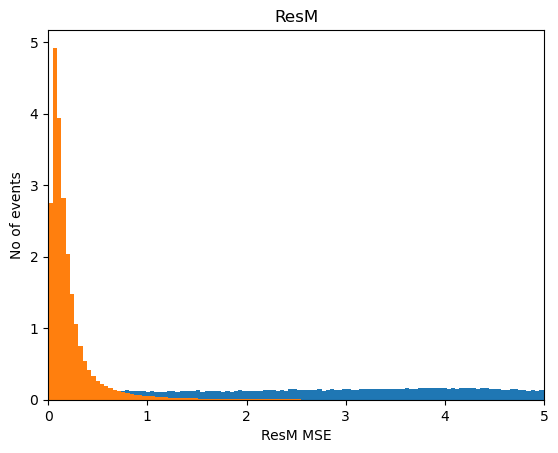

In [44]:
plt.hist(resM_loss_mse[None, :], bins=500, density=True)
plt.hist(bkg_loss_mse[None, :], bins=500, density=True)

plt.xlabel("ResM MSE")
plt.xlim(0, 5)
plt.ylabel("No of events")
plt.title("ResM")
save_resmmse = "/Users/oliviashuter/LIP CODE/LOSS GRAPHS/resm_mse2.pdf"
plt.savefig(save_resmmse, format='pdf')
plt.show()

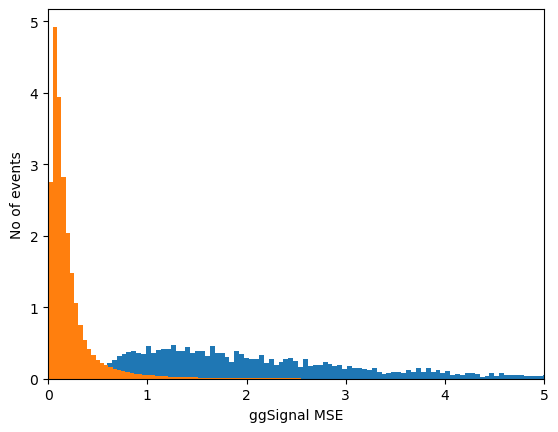

In [45]:
plt.hist(gg_loss_mse[None, :], bins=500, density=True)
plt.hist(bkg_loss_mse[None, :], bins=500, density=True)

plt.xlabel("ggSignal MSE")
plt.xlim(0, 5)
plt.ylabel("No of events")
save_ggmse = "/Users/oliviashuter/LIP CODE/LOSS GRAPHS/gg_mse.pdf"
plt.savefig(save_ggmse, format='pdf')
plt.show()

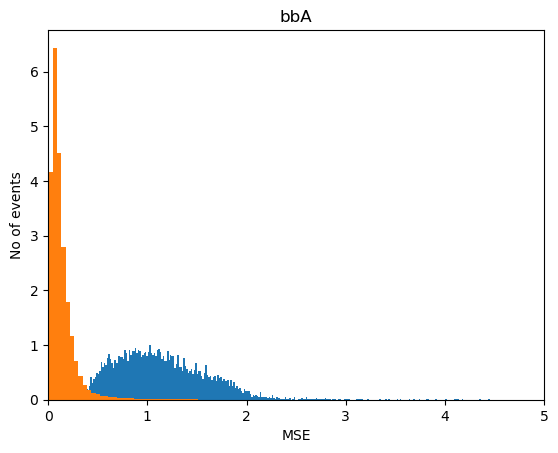

In [46]:
plt.hist(bba_loss_mse[None, :], bins=500, density=True)
plt.hist(bkg_loss_mse[None, :], bins=500, density=True, weights=bkg_test_weights)

plt.xlabel("MSE")
plt.xlim(0, 5)
#plt.xscale("log")
plt.ylabel("No of events")
plt.title("bbA")
save_bbamse = "/Users/oliviashuter/LIP CODE/LOSS GRAPHS/bba_mse.pdf"
plt.savefig(save_bbamse, format='pdf')
plt.show()

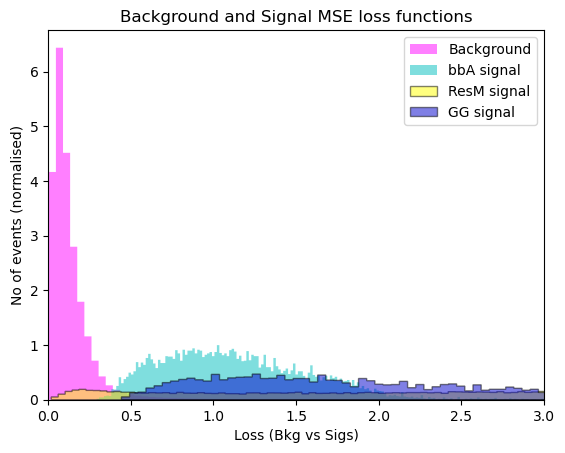

In [61]:
density=True

plt.hist(bkg_loss_mse[None, :], bins=500, histtype='stepfilled', density=density, label="Background", color="Magenta", alpha=0.5, weights=bkg_test_weights)
plt.hist(bba_loss_mse[None, :], bins=500, histtype='stepfilled', density=density, label="bbA signal", color="c", alpha=0.5)
plt.hist(resM_loss_mse[None, :], bins=500, histtype='stepfilled', density=density, label="ResM signal", color="yellow", edgecolor="black", alpha=0.5)
plt.hist(gg_loss_mse[None, :], bins=500, histtype='stepfilled', density=density, label="GG signal", color="MediumBlue", edgecolor="black",alpha=0.5)

plt.xlabel(r"Loss (Bkg vs Sigs)")
plt.ylabel(r"No of events (normalised)")
# plt.ylim([0, 15])
#plt.yscale("log")
plt.title("Background and Signal MSE loss functions")
plt.xlim([0, 3 ])
save_comparison = "/Users/oliviashuter/LIP CODE/LOSS GRAPHS/msecomp.pdf"
plt.savefig(save_comparison, format='pdf')
plt.legend()
plt.show()

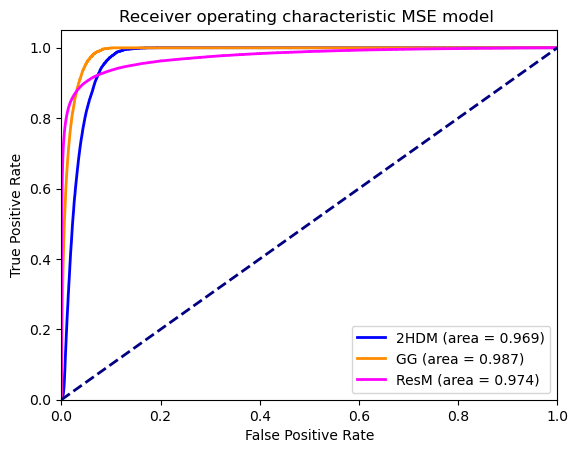

In [134]:
from sklearn.metrics import *

ybba_score = np.concatenate((bba_loss_mse, bkg_loss_mse))
ybba_true = np.concatenate((bbasig_label, bkg_label))
fpr_bba, tpr_bba, thresholds = roc_curve(ybba_true, ybba_score)
roc_auc_bba = auc(fpr_bba, tpr_bba)

ygg_score = np.concatenate((gg_loss_mse, bkg_loss_mse))
ygg_true = np.concatenate((ggsig_label, bkg_label))
fpr_gg, tpr_gg, thresholds = roc_curve(ygg_true, ygg_score)
roc_auc_gg = auc(fpr_gg, tpr_gg)

y_score = np.concatenate((resM_loss_mse, bkg_loss_mse))
y_true = np.concatenate((sig_label, bkg_label))
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr_bba, tpr_bba, color='b',lw=lw, label='2HDM (area = %0.3f)' % roc_auc_bba)
plt.plot(fpr_gg, tpr_gg, color='darkorange',lw=lw, label='GG (area = %0.3f)' % roc_auc_gg)
plt.plot(fpr, tpr, color='magenta',lw=lw, label='ResM (area = %0.3f)' % roc_auc)
# add for each loss


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic MSE model ')
plt.legend(loc="lower right")
save_mseroc = "/Users/oliviashuter/LIP CODE/ROCS/mseroc.pdf"
plt.savefig(save_mseroc, format='pdf')
plt.show()

## MAE

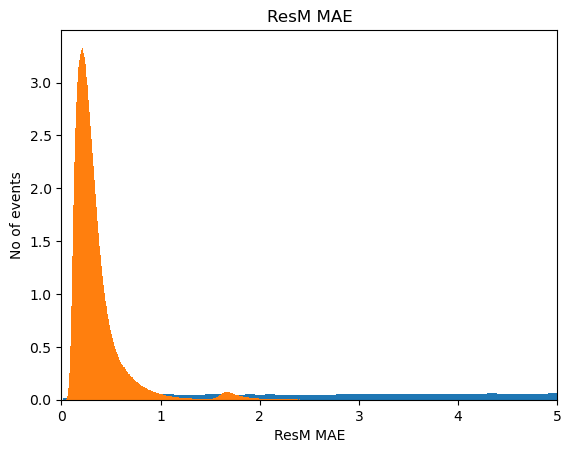

In [56]:
plt.hist(resM_loss_mae[None, :], bins=500, density=True)
plt.hist(bkg_loss_mae[None, :], bins=500, density=True)

plt.xlabel("ResM MAE")
plt.xlim(0, 5)
plt.ylabel("No of events")
plt.title("ResM MAE")
save_resmmae = "/Users/oliviashuter/LIP CODE/LOSS GRAPHS/resm_mae2.pdf"
plt.savefig(save_resmmae, format='pdf')
plt.show()

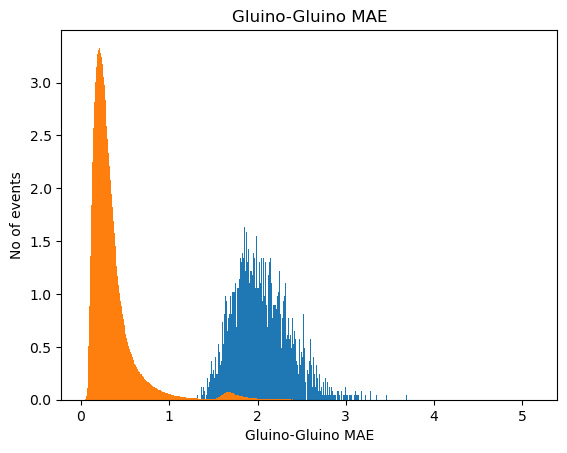

In [57]:
plt.hist(gg_loss_mae[None, :], bins=500, density=True)
plt.hist(bkg_loss_mae[None, :], bins=500, density=True)

plt.xlabel("Gluino-Gluino MAE")
# plt.xlim(0, 5)
#plt.xscale("log")
plt.ylabel("No of events")
plt.title("Gluino-Gluino MAE")
save_ggmae = "/Users/oliviashuter/LIP CODE/LOSS GRAPHS/gg_mae2.pdf"
plt.savefig(save_ggmae, format='pdf')
plt.show()

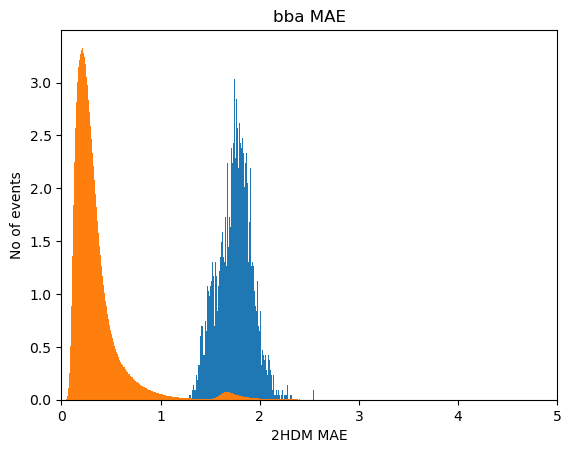

In [130]:
plt.hist(bba_loss_mae[None, :], bins=500, density=True)
plt.hist(bkg_loss_mae[None, :], bins=500, density=True)

plt.xlabel("2HDM MAE")
plt.xlim(0, 5)
#plt.xscale("log")
plt.ylabel("No of events")
plt.title("bba MAE")
save_bbamae = "/Users/oliviashuter/LIP CODE/LOSS GRAPHS/bba_mae2.png"
plt.savefig(save_bbamae, format='png')
plt.show()

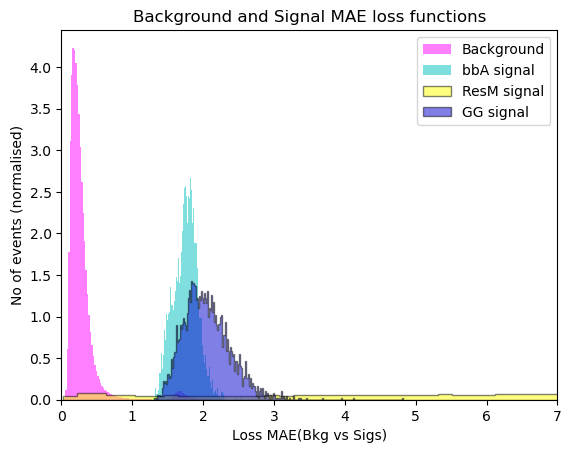

In [135]:
density=True

plt.hist(bkg_loss_mae[None, :], bins=250, histtype='stepfilled', density=density, label="Background", color="Magenta", alpha=0.5, weights=bkg_test_weights)
plt.hist(bba_loss_mae[None, :], bins=250, histtype='stepfilled', density=density, label="bbA signal", color="c", alpha=0.5)
plt.hist(resM_loss_mae[None, :], bins=250, histtype='stepfilled', density=density, label="ResM signal", color="yellow", edgecolor="black", alpha=0.5)
plt.hist(gg_loss_mae[None, :], bins=250, histtype='stepfilled', density=density, label="GG signal", color="MediumBlue", edgecolor="black",alpha=0.5)

plt.xlabel(r"Loss MAE(Bkg vs Sigs)")
plt.ylabel(r"No of events (normalised)")
# plt.ylim([0, 15])
#plt.xscale("log")
plt.title("Background and Signal MAE loss functions")
plt.xlim([0, 7])
save_comparison_mae = "/Users/oliviashuter/LIP CODE/LOSS GRAPHS/maecomp.png"
plt.savefig(save_comparison_mae, format='png')
plt.legend()
plt.show()

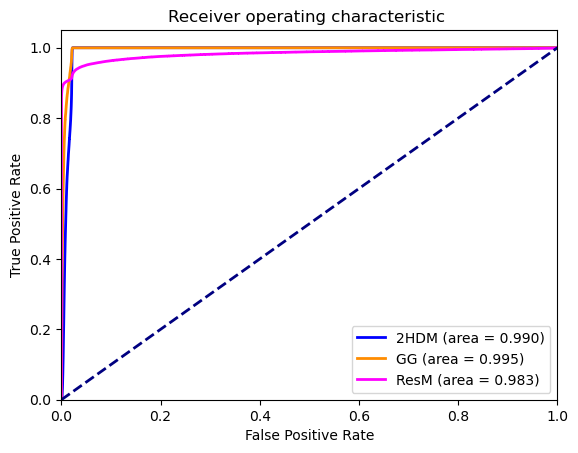

In [64]:
from sklearn.metrics import *

ybba_score1 = np.concatenate((bba_loss_mae, bkg_loss_mae))
ybba_true1 = np.concatenate((bbasig_label, bkg_label))
fpr_bba1, tpr_bba1, thresholds = roc_curve(ybba_true1, ybba_score1)
roc_auc_bba1 = auc(fpr_bba1, tpr_bba1)

ygg_score1 = np.concatenate((gg_loss_mae, bkg_loss_mae))
ygg_true1 = np.concatenate((ggsig_label, bkg_label))
fpr_gg1, tpr_gg1, thresholds = roc_curve(ygg_true1, ygg_score1)
roc_auc_gg1 = auc(fpr_gg1, tpr_gg1)

y_score1 = np.concatenate((resM_loss_mae, bkg_loss_mae))
y_true1 = np.concatenate((sig_label, bkg_label))
fpr1, tpr1, thresholds = roc_curve(y_true1, y_score1)
roc_auc1 = auc(fpr1, tpr1)

plt.figure()
lw = 2
plt.plot(fpr_bba1, tpr_bba1, color='b',lw=lw, label='2HDM (area = %0.3f)' % roc_auc_bba1)
plt.plot(fpr_gg1, tpr_gg1, color='darkorange',lw=lw, label='GG (area = %0.3f)' % roc_auc_gg1)
plt.plot(fpr1, tpr1, color='magenta',lw=lw, label='ResM (area = %0.3f)' % roc_auc1)
# add for each loss


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic MAE')
plt.legend(loc="lower right")
save_maeroc = "/Users/oliviashuter/LIP CODE/ROCS/maeroc.png"
plt.savefig(save_maeroc, format='png')
plt.show()

In [78]:
encoded_imgs_mse = autoencoder_mse.encoder(bkg_train_scaled[:]).numpy()
decoded_imgs_mse = autoencoder_mse.decoder(encoded_imgs_mse).numpy()

In [79]:
variable_mse=bkg_train.columns
print(variable_mse)

testColumn = bkg_train.columns

decodedData_mse = pd.DataFrame(data=decoded_imgs_mse, columns=testColumn)
testData_mse = pd.DataFrame(data=bkg_test_scaled, columns=testColumn)

Index(['jet_DL1r_max', 'jet_e', 'topjet_pt', 'MET_eta', 'topjet_e', 'ljet_m',
       'MET', 'topjet_phi', 'jet_eta', 'ljet_py', 'ljet_phi', 'ljet_pz',
       'DeltaR_max', 'ljet_eta', 'ljet_pt', 'jet_pt', 'MET_px', 'MET_m',
       'MET_Phi', 'jet_pz', 'MET_py', 'jet_py', 'mtop', 'Centrality', 'jet_px',
       'ljet_e', 'topjet_eta', 'jet_phi', 'ljet_px', 'topjet_m', 'HT',
       'Omega'],
      dtype='object')


jet_DL1r_max


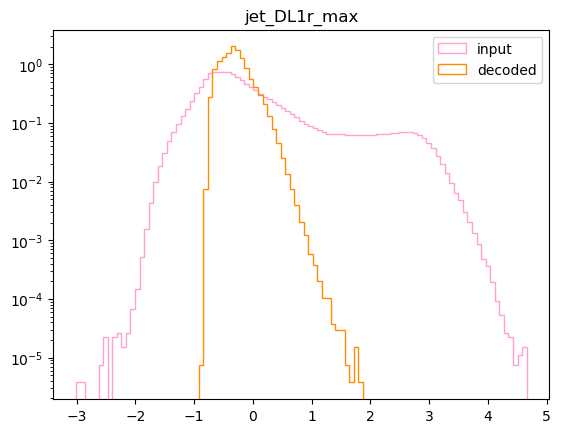

jet_e


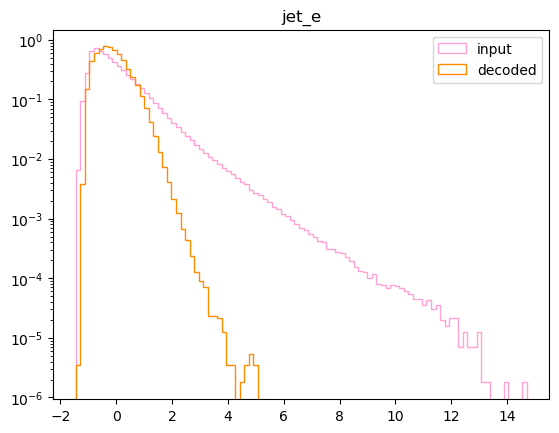

topjet_pt


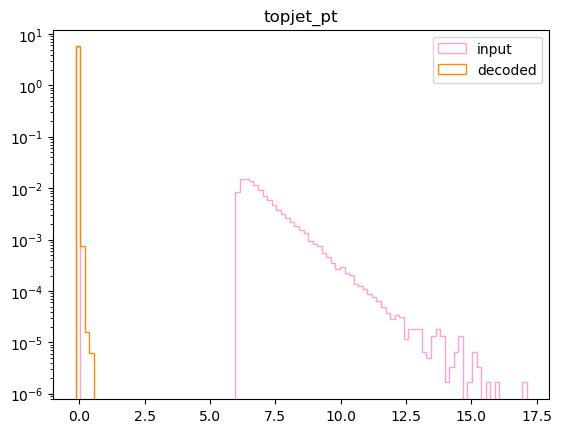

MET_eta


/var/folders/wx/wv04sj0s6151mjvcnq4zwhtr0000gn/T/ipykernel_1307/1679755189.py:17: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


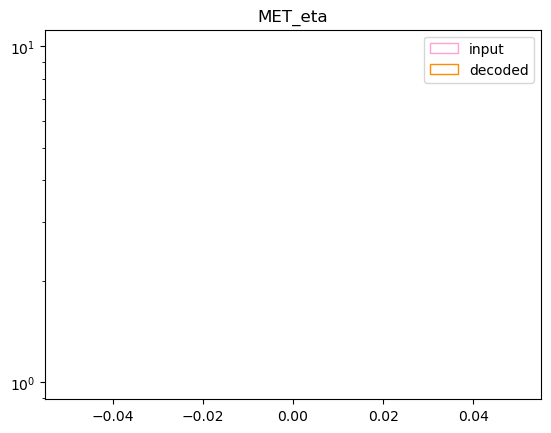

topjet_e


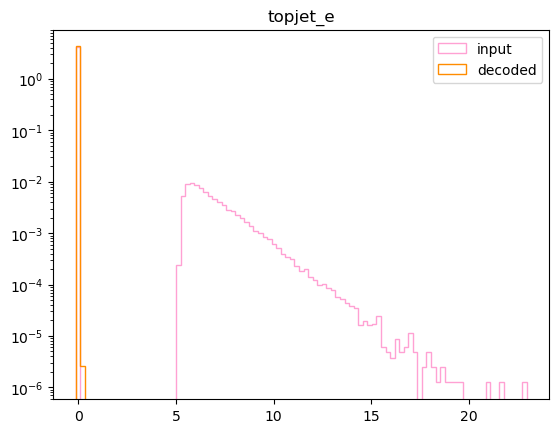

ljet_m


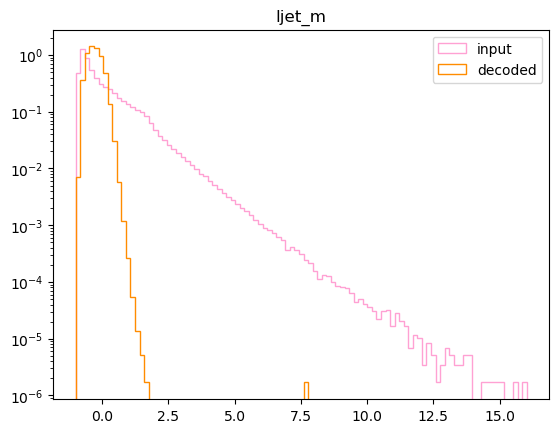

MET


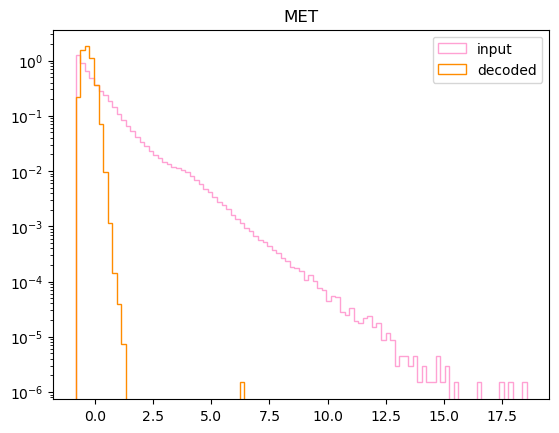

topjet_phi


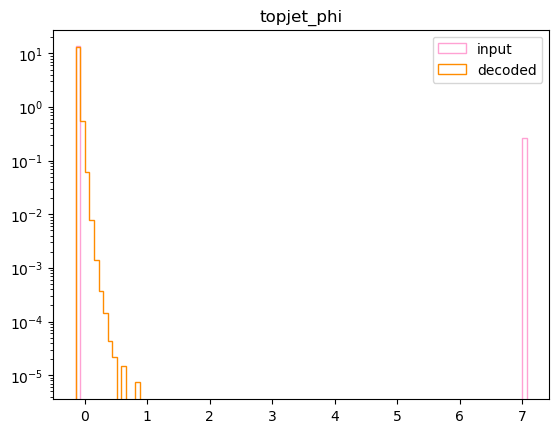

jet_eta


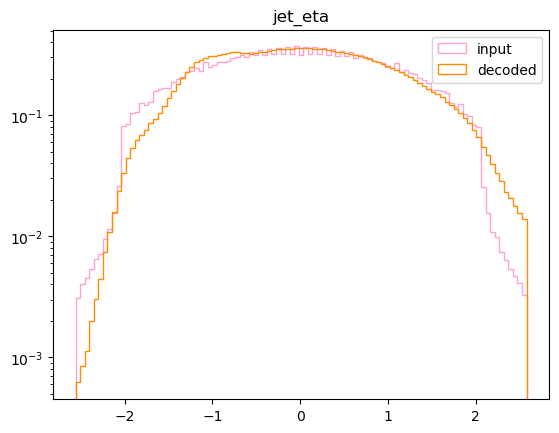

ljet_py


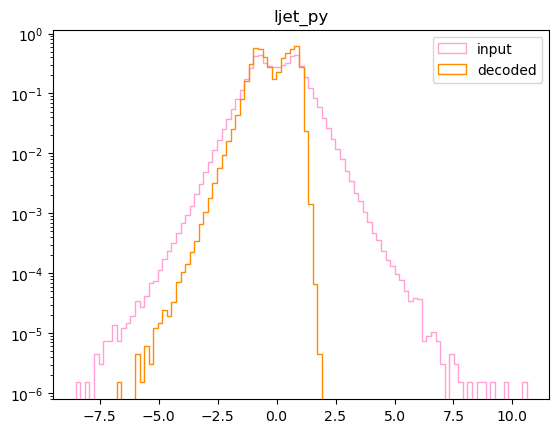

ljet_phi


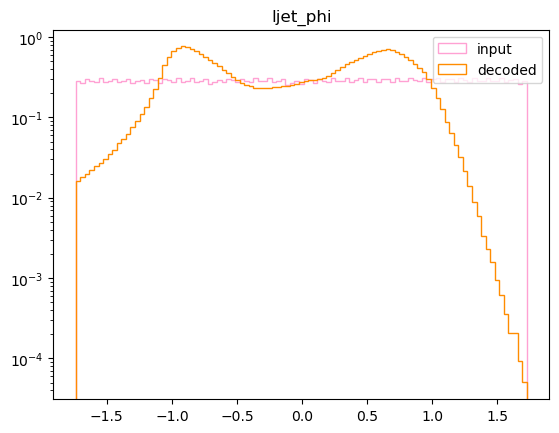

ljet_pz


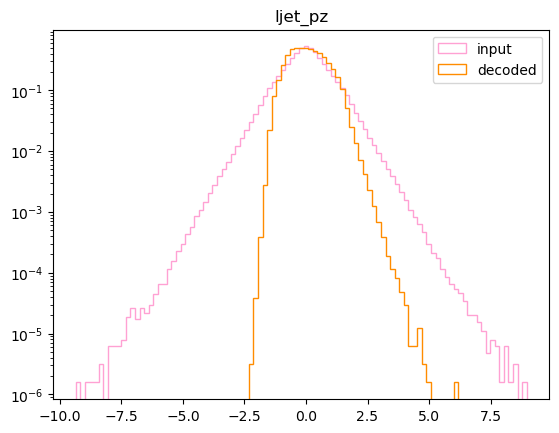

DeltaR_max


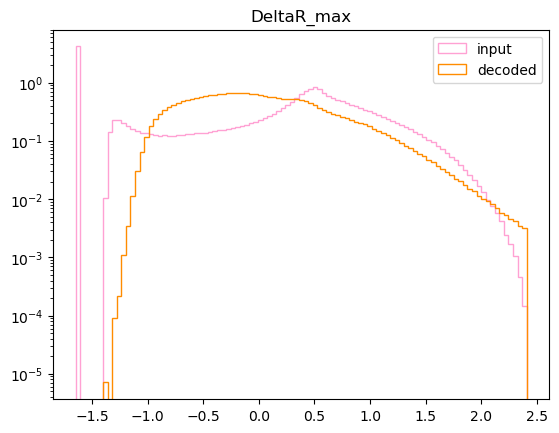

ljet_eta


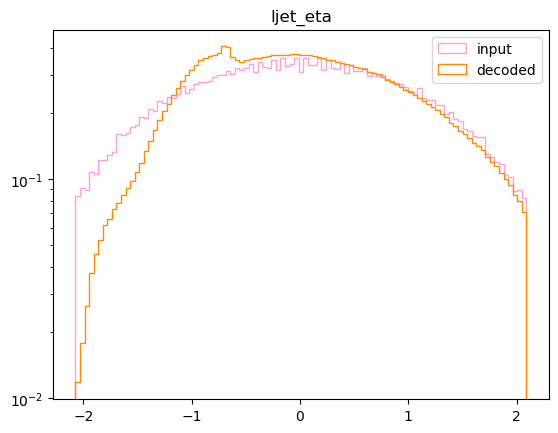

ljet_pt


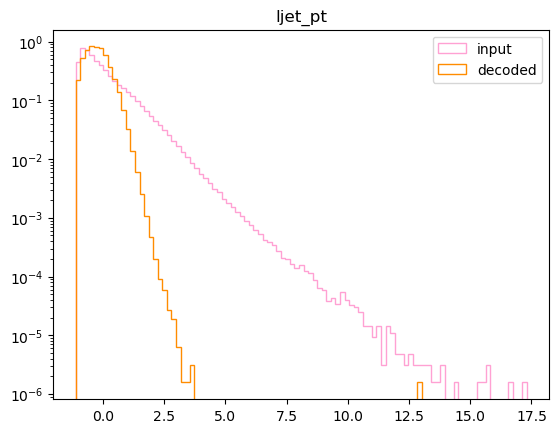

jet_pt


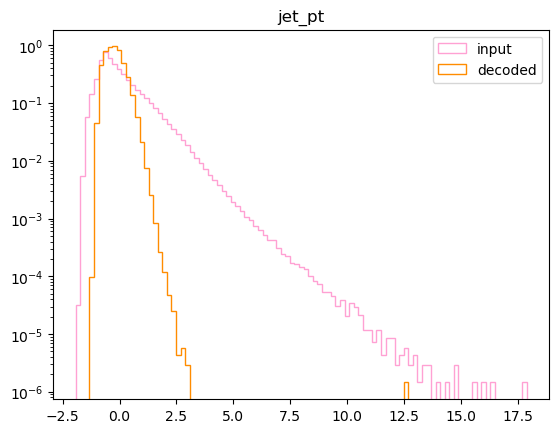

MET_px


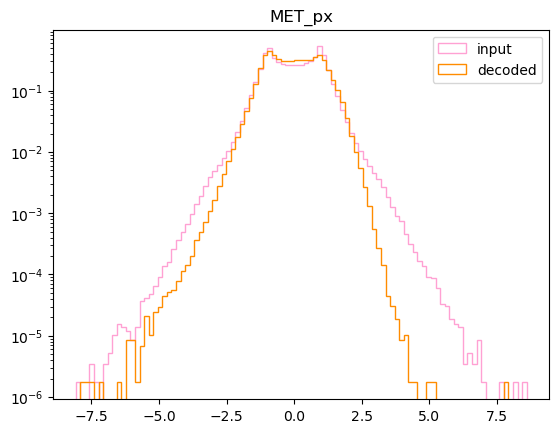

MET_m


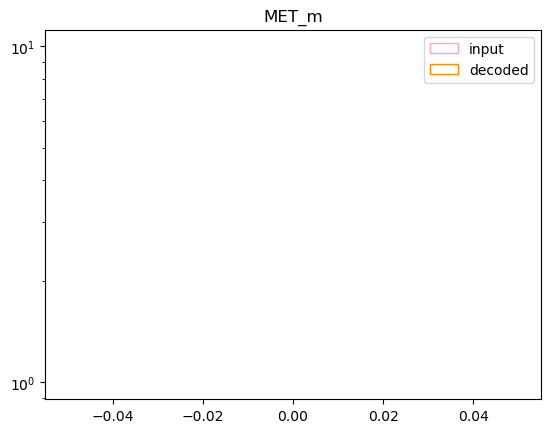

MET_Phi


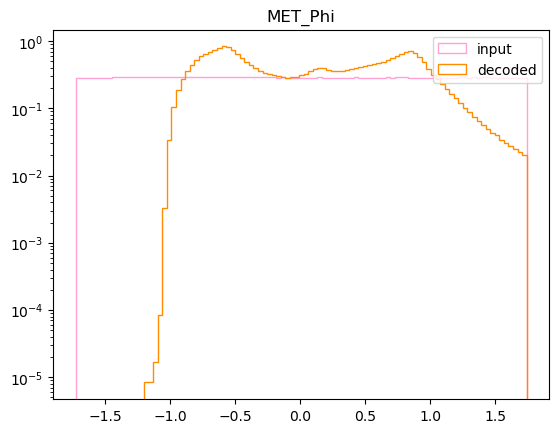

jet_pz


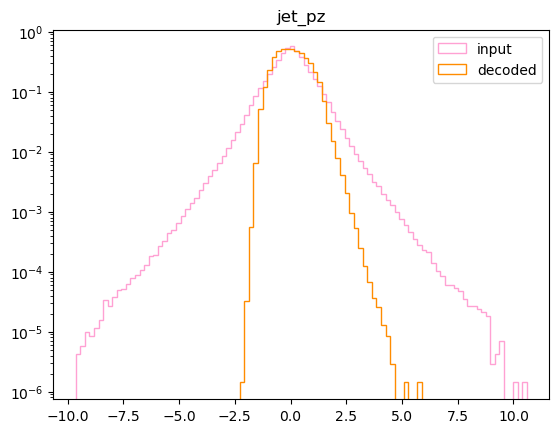

MET_py


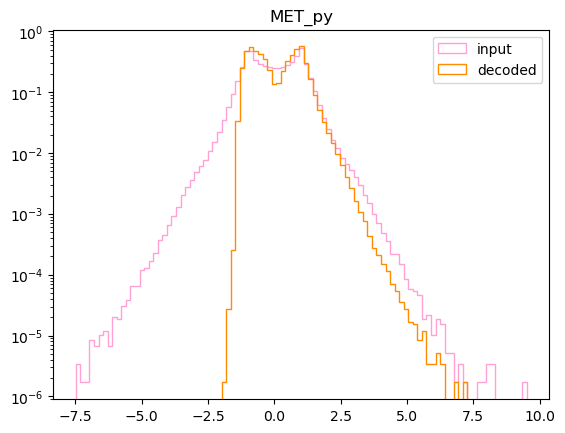

jet_py


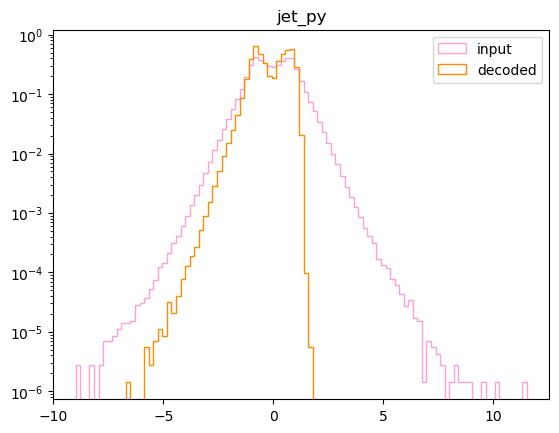

mtop


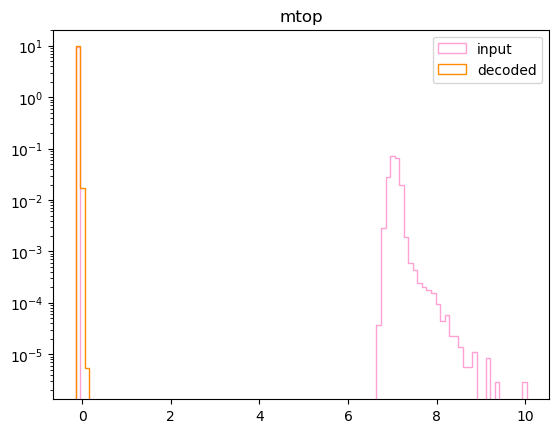

Centrality


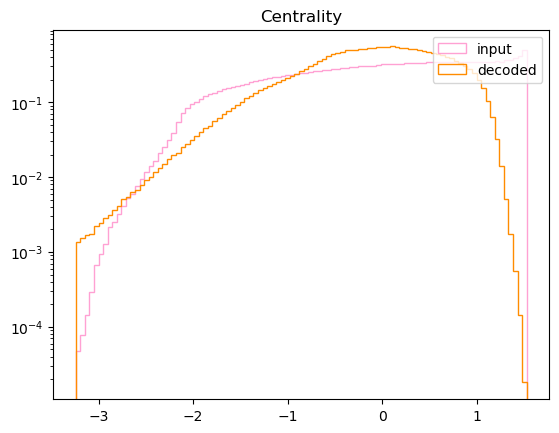

jet_px


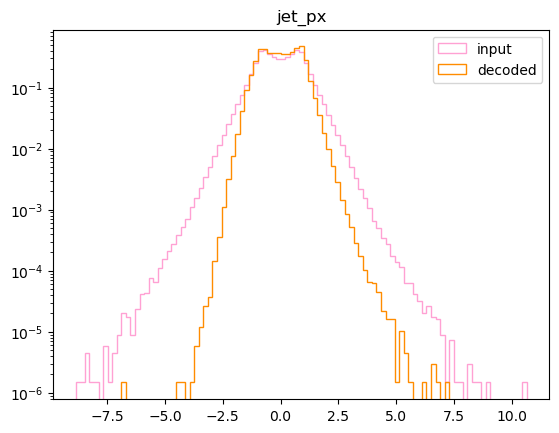

ljet_e


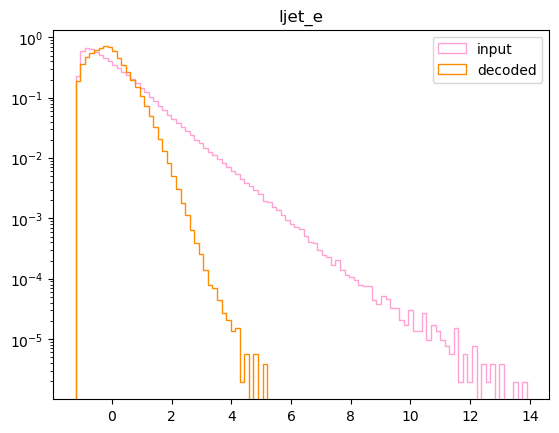

topjet_eta


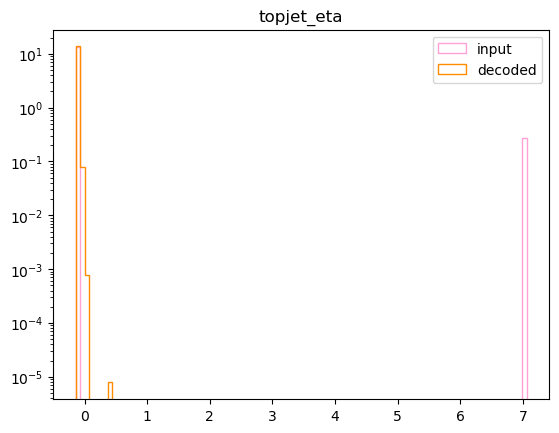

jet_phi


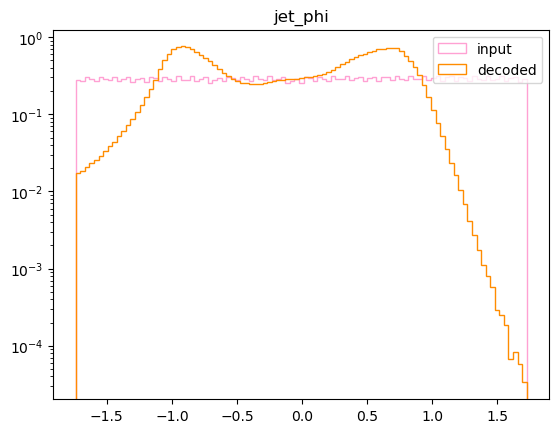

ljet_px


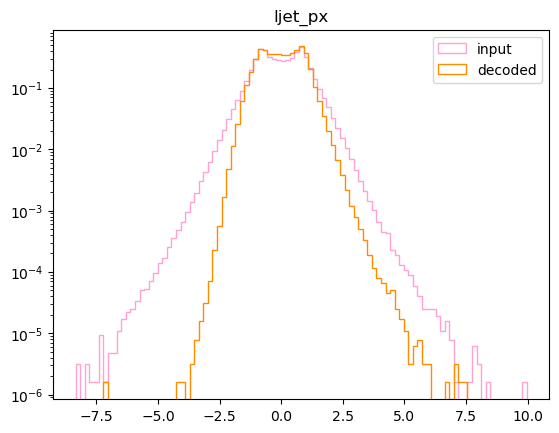

topjet_m


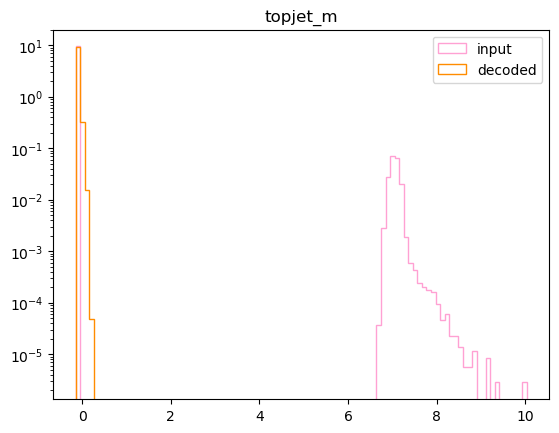

HT


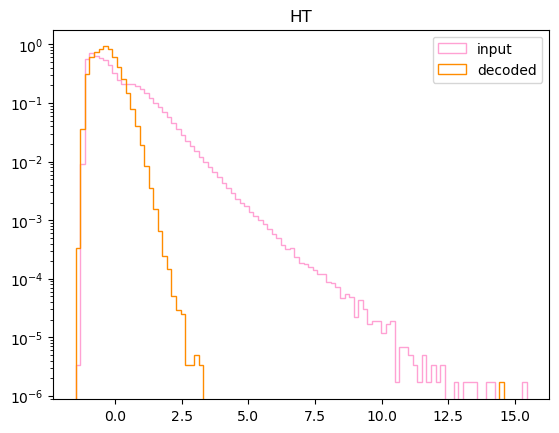

Omega


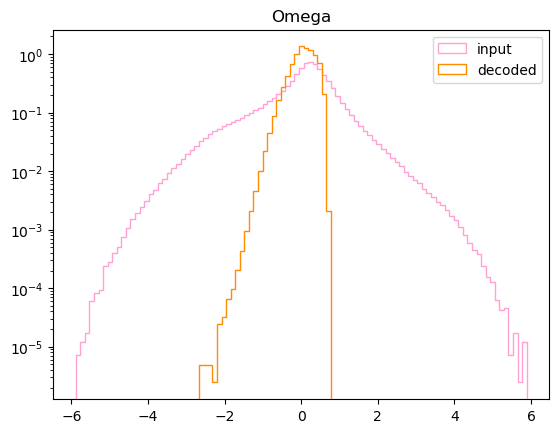

In [122]:
output_directory = '/Users/oliviashuter/LIP CODE/Reconstructions MSE/'

for feature in variable_mse:
    density = True
    print(feature)
    maximum = testData[feature].max()
    minimum = testData[feature].min()
    binedges = np.linspace(minimum, maximum, 100)

    plt.hist(testData_mse[feature], bins=binedges, density=density, label="input", color='deeppink', histtype="step", alpha=0.4)
    plt.hist(decodedData_mse[feature], bins=binedges, density=density,
             label="decoded",
             color='darkorange',
             histtype="step")
    plt.legend()
    plt.title(feature)
    plt.yscale("log")
    figure_filename = output_directory + feature + '.png'
    plt.savefig(figure_filename)
    plt.show()


plt.close('all')


In [85]:
encoded_imgs_mae = autoencoder_mae.encoder(bkg_train_scaled[:]).numpy()
decoded_imgs_mae = autoencoder_mae.decoder(encoded_imgs_mae).numpy()

In [86]:
variable_mae=bkg_train.columns
print(variable_mae)

testColumn = bkg_train.columns

decodedData_mae = pd.DataFrame(data=decoded_imgs_mae, columns=testColumn)
testData_mae = pd.DataFrame(data=bkg_test_scaled, columns=testColumn)

Index(['jet_DL1r_max', 'jet_e', 'topjet_pt', 'MET_eta', 'topjet_e', 'ljet_m',
       'MET', 'topjet_phi', 'jet_eta', 'ljet_py', 'ljet_phi', 'ljet_pz',
       'DeltaR_max', 'ljet_eta', 'ljet_pt', 'jet_pt', 'MET_px', 'MET_m',
       'MET_Phi', 'jet_pz', 'MET_py', 'jet_py', 'mtop', 'Centrality', 'jet_px',
       'ljet_e', 'topjet_eta', 'jet_phi', 'ljet_px', 'topjet_m', 'HT',
       'Omega'],
      dtype='object')


jet_DL1r_max


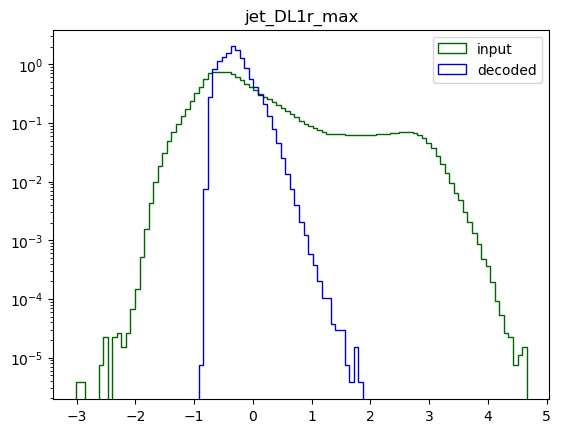

jet_e


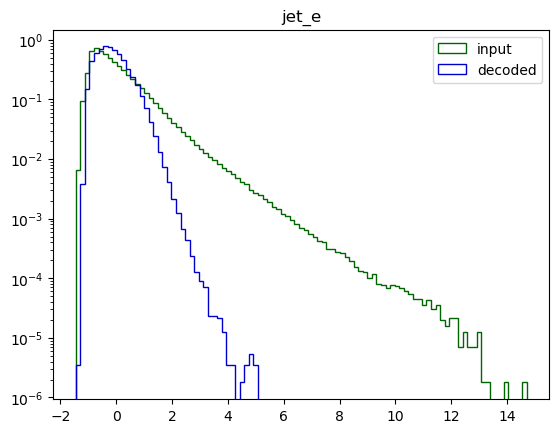

topjet_pt


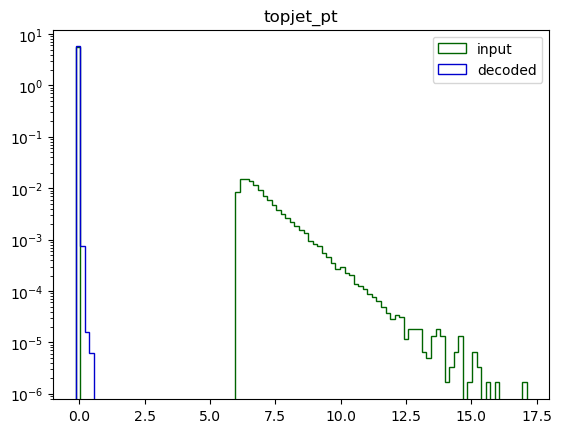

MET_eta


/var/folders/wx/wv04sj0s6151mjvcnq4zwhtr0000gn/T/ipykernel_1307/658551306.py:17: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


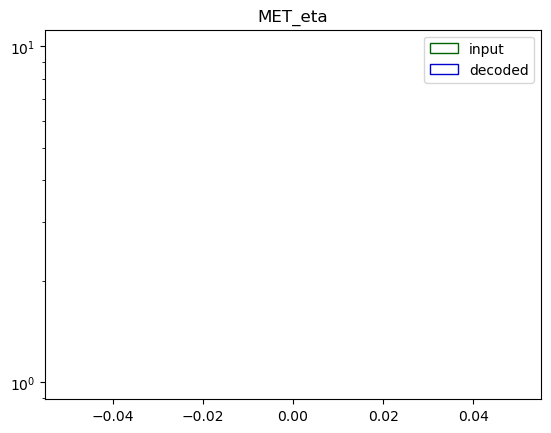

topjet_e


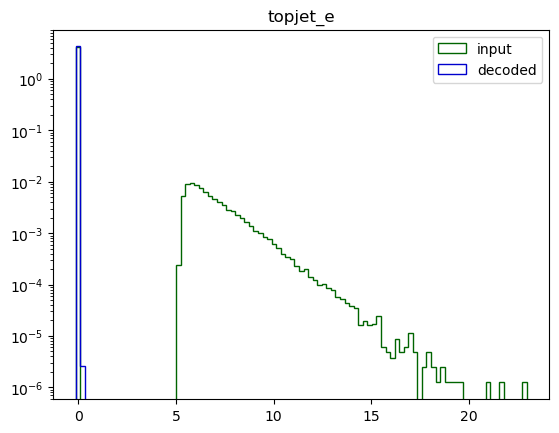

ljet_m


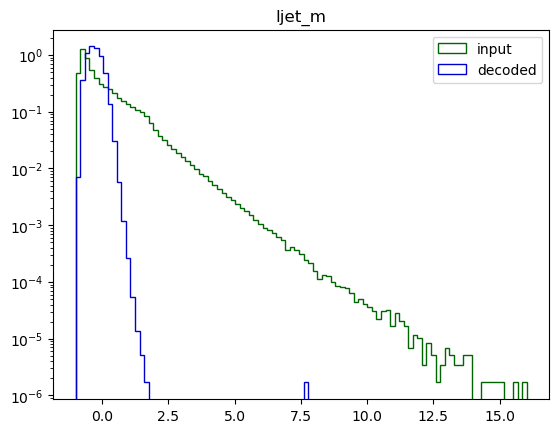

MET


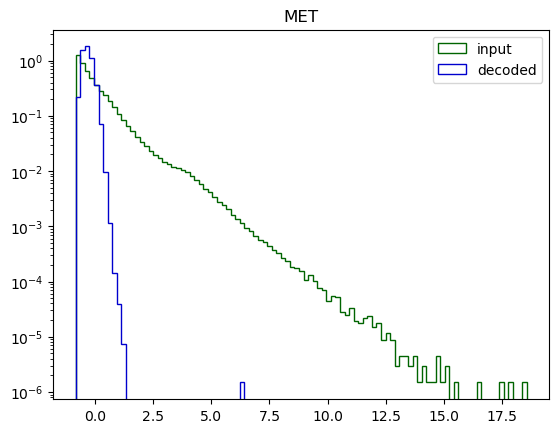

topjet_phi


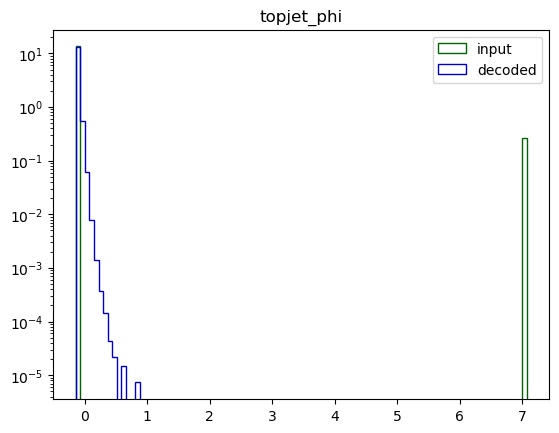

jet_eta


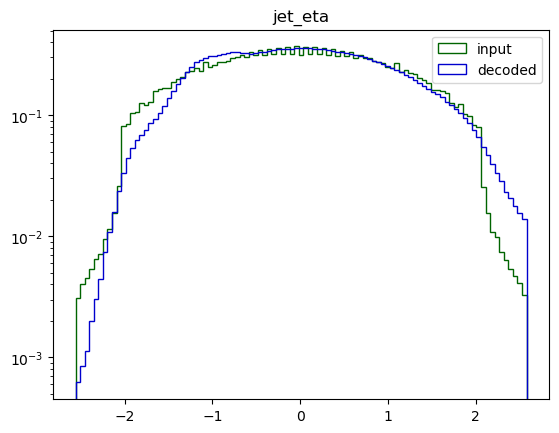

ljet_py


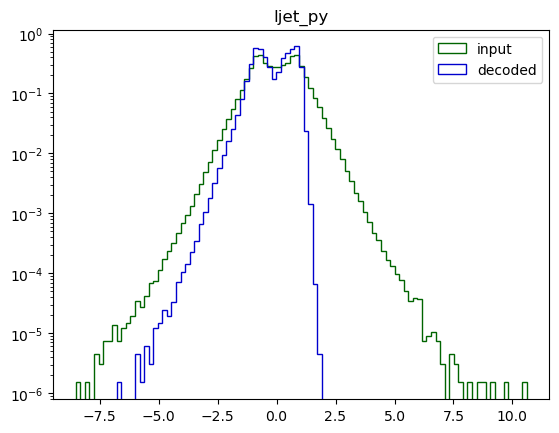

ljet_phi


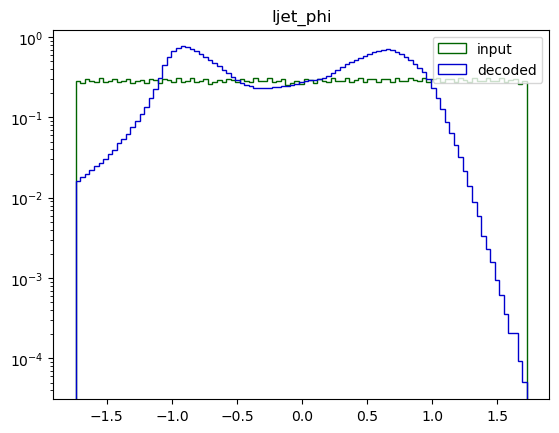

ljet_pz


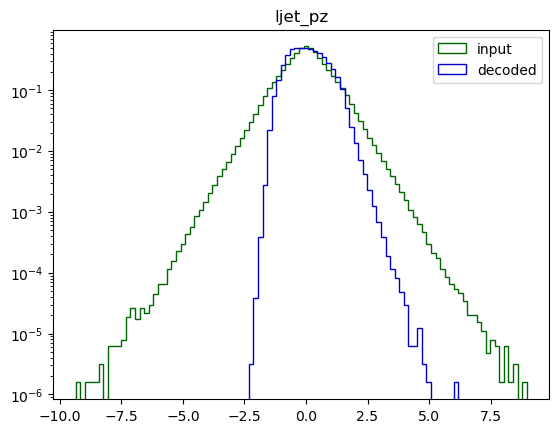

DeltaR_max


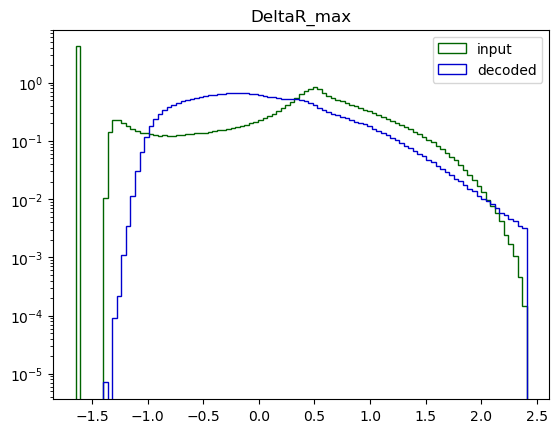

ljet_eta


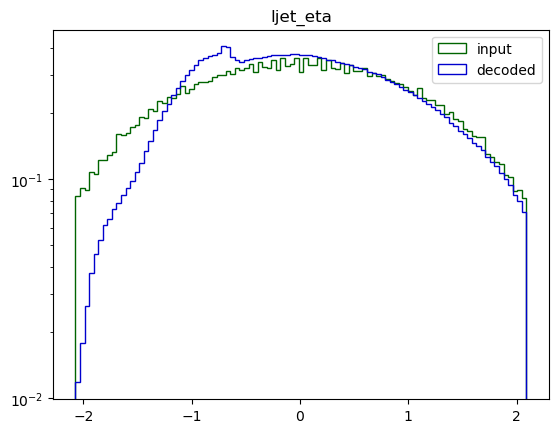

ljet_pt


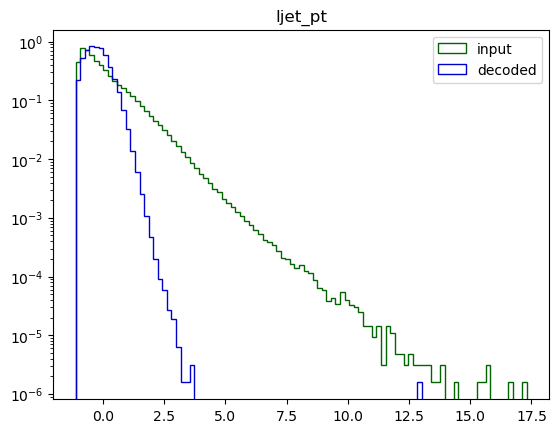

jet_pt


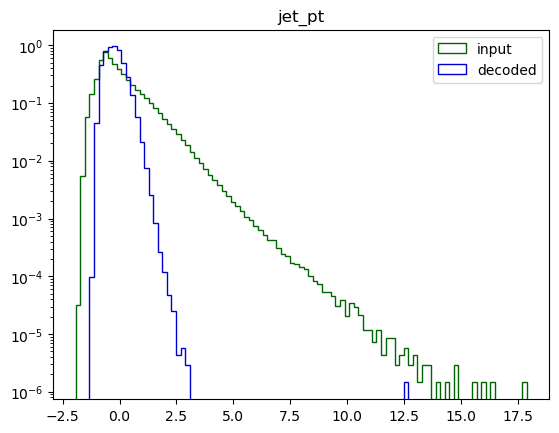

MET_px


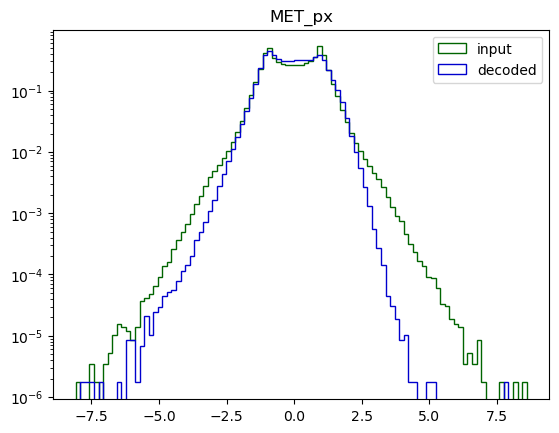

MET_m


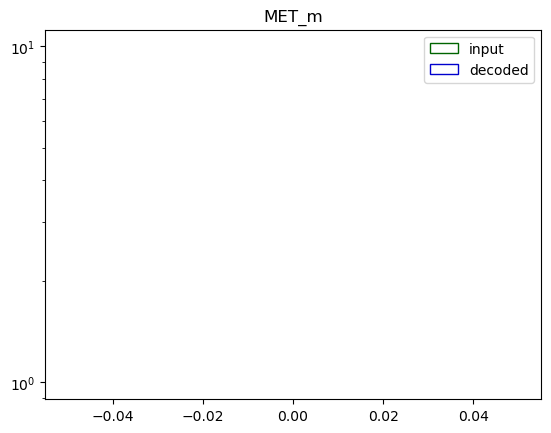

MET_Phi


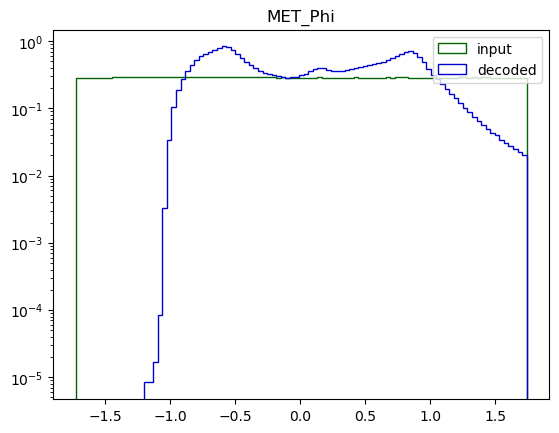

jet_pz


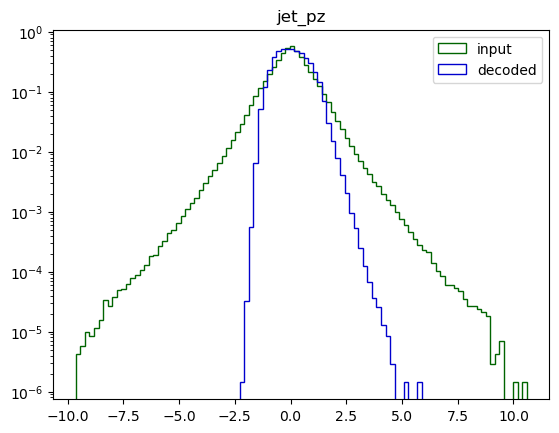

MET_py


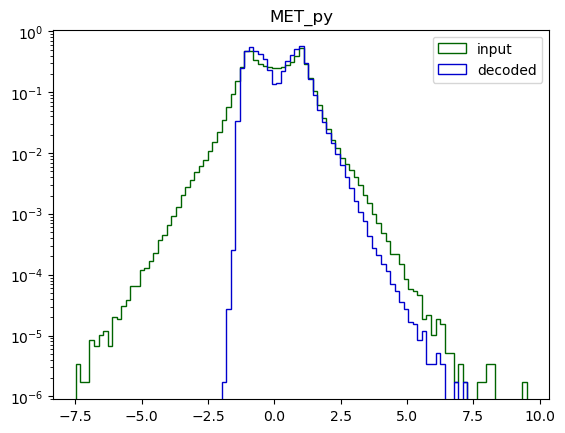

jet_py


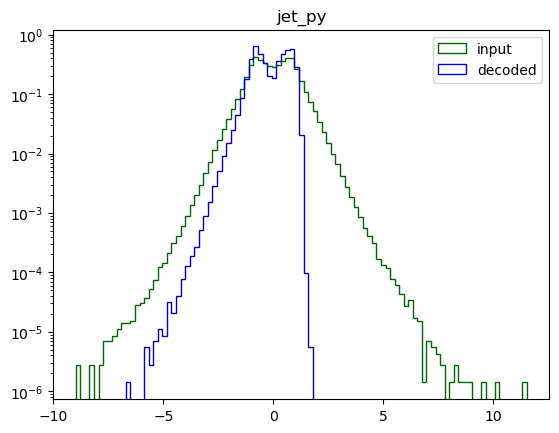

mtop


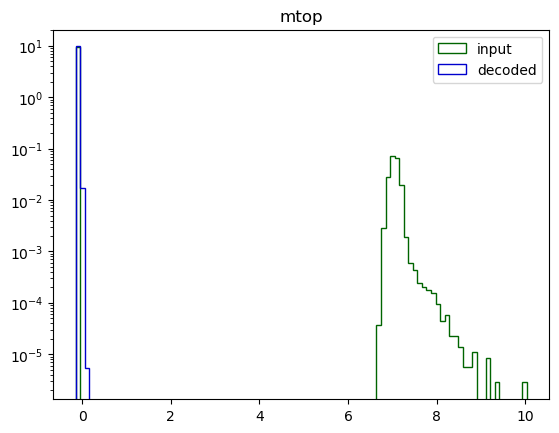

Centrality


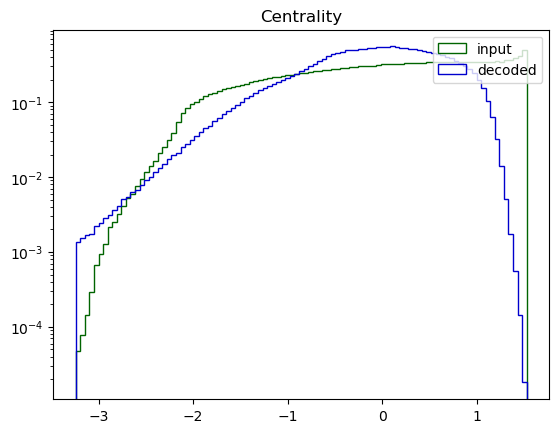

jet_px


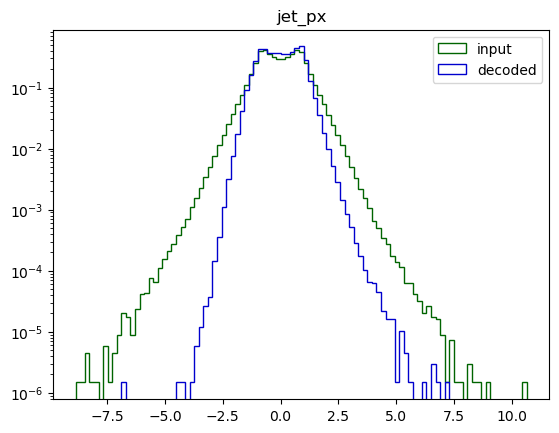

ljet_e


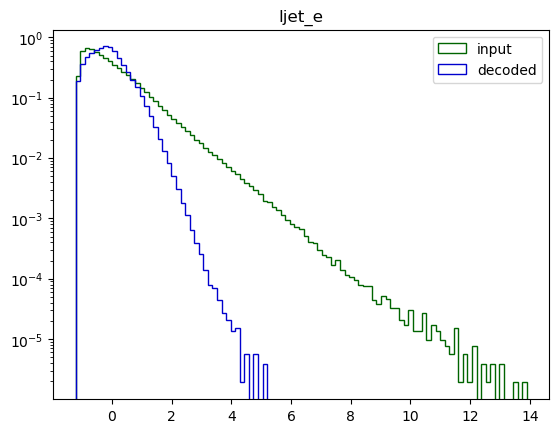

topjet_eta


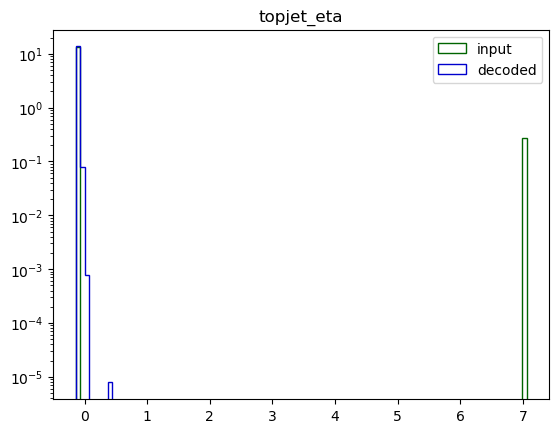

jet_phi


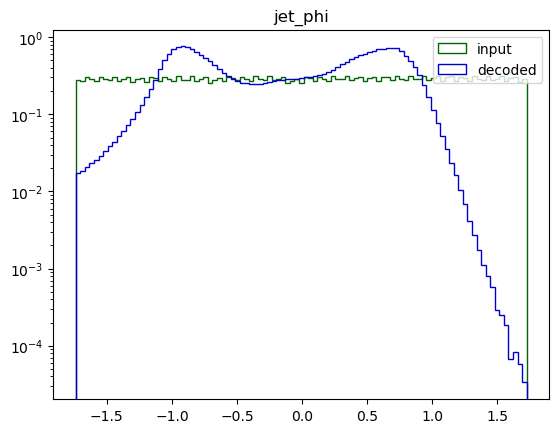

ljet_px


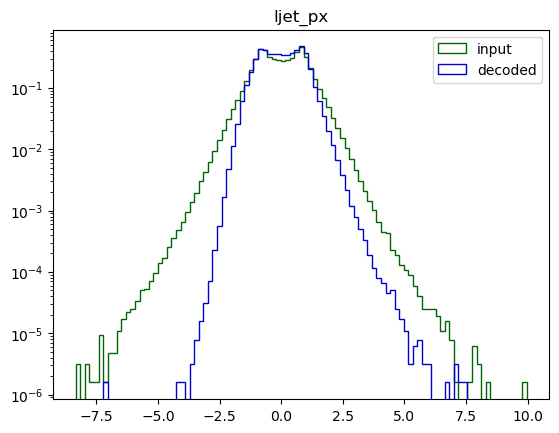

topjet_m


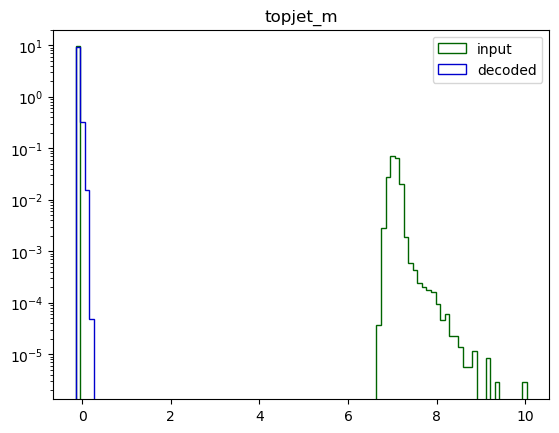

HT


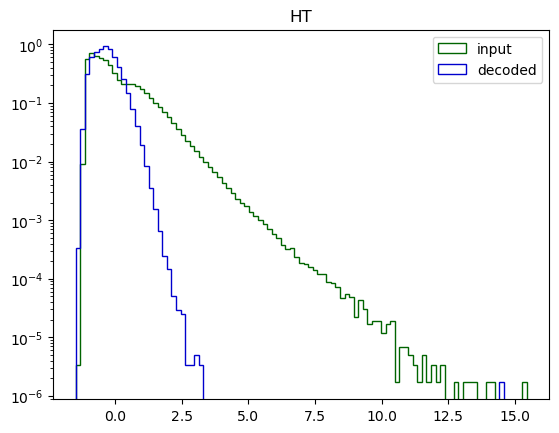

Omega


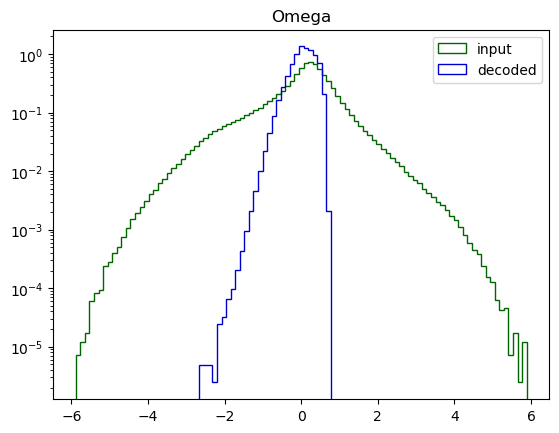

In [113]:
output_directory = '/Users/oliviashuter/LIP CODE/Reconstructions MAE/'

for feature in variable_mae:
    density = True
    print(feature)
    maximum = testData[feature].max()
    minimum = testData[feature].min()
    binedges = np.linspace(minimum, maximum, 100)

    plt.hist(testData_mae[feature], bins=binedges, density=density, label="input", color="darkgreen", histtype="step")
    plt.hist(decodedData_mae[feature], bins=binedges, density=density,
             label="decoded",
             color='mediumblue',
             histtype="step")
    plt.legend()
    plt.title(feature)
    plt.yscale("log")
    figure_filename = output_directory + feature + '.png'
    plt.savefig(figure_filename)
    plt.show()


plt.close('all')
